<a href="https://colab.research.google.com/github/writezubair-cpu/ZAK-TEST_AI_Training/blob/main/Copy_of_decison_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an excellent project idea that combines the concept of using Decision Trees, as detailed in the sources, with the practical steps of creating synthetic data and running the entire process in a Google Colab environment.

Since the provided sources focus on **Decision Trees** and the implementation using **scikit-learn** in **Python**, the project will be structured around applying this model to a hypothetical prediction task in an energy plant environment.

# Project Proposal: Energy Plant Component Failure Prediction

**Objective:** To build and train a Decision Tree Classifier to predict the likelihood of critical component failure (e.g., a turbine bearing or cooling pump) based on synthetic operational data.

**Model Used:** Decision Tree Classifier.

In [ ]:
# ==============================================================================
# CELL 1: Setup and Synthetic Data Generation
# Project Focus: Predicting Component Health (Classification)
# ==============================================================================

# Import necessary libraries
import pandas as pd
import numpy as np
# We grab the Decision Tree blueprint from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# --- Define Synthetic Data Parameters ---

# Note: The sources indicate that any machine learning model needs data to learn from.
# We are creating 'features' (X data) and 'correct answers' (Y data).
N_SAMPLES = 1000  # Number of operational data points (rows)

# Features we imagine an energy plant component would track:
# 1. Temperature (C)
# 2. Vibration (mm/s)
# 3. Pressure (Bar)
# 4. Age of Component (Months)
features = {
    'Temperature': np.random.uniform(50, 200, N_SAMPLES),
    'Vibration': np.random.uniform(0.5, 10.0, N_SAMPLES),
    'Pressure': np.random.uniform(10, 100, N_SAMPLES),
    'Age': np.random.randint(1, 60, N_SAMPLES)
}

df = pd.DataFrame(features)


In [ ]:
df

,Temperature,Vibration,Pressure,Age
0,54.185435,2.181450,88.488815,59
1,60.232861,8.298965,86.412149,43
2,96.392209,9.511056,29.286625,37
3,185.740371,2.271435,42.412232,22
4,169.598242,1.033743,11.286712,27
...,...,...,...,...
995,173.007174,8.937799,13.536890,34
996,76.225351,5.985131,74.307467,5
997,110.152612,7.599754,26.857466,27
998,192.861412,2.556784,33.063908,48


In [ ]:
# --- Create Synthetic Target Variable (Y data) ---

# We define a simple, noisy logic (the 'ground truth') for failure (1) vs. normal (0).
# This mimics how the model learns connections between features and outcomes.
# For example: High Temp ( > 150) AND High Vibration ( > 8.0) OR High Age ( > 48) leads to failure.
df['Failure_Risk'] = 0 # Start assuming no risk

# Logic 1: High Stress conditions
high_stress = (df['Temperature'] > 150) & (df['Vibration'] > 8.0)
df.loc[high_stress, 'Failure_Risk'] = 1

# Logic 2: End-of-life condition
old_age = df['Age'] > 48
df.loc[old_age, 'Failure_Risk'] = 1

# Add some random 'noise' (like real-world data) to prevent perfect correlation
random_noise_indices = np.random.choice(df.index, size=int(N_SAMPLES * 0.05), replace=False)
df.loc[random_noise_indices, 'Failure_Risk'] = 1 - df.loc[random_noise_indices, 'Failure_Risk']

print("Synthetic Data Head:")
print(df.head())

Synthetic Data Head:
   Temperature  Vibration   Pressure  Age  Failure_Risk
0    54.185435   2.181450  88.488815   59             1
1    60.232861   8.298965  86.412149   43             0
2    96.392209   9.511056  29.286625   37             0
3   185.740371   2.271435  42.412232   22             0
4   169.598242   1.033743  11.286712   27             0



Model Training Complete.
The model has learned a series of if-then questions (flowchart logic).

Model Accuracy on Test Data: 0.95

Prediction for New Data (Temp=180, Vib=9.5): High Failure Risk (Prediction: 1)


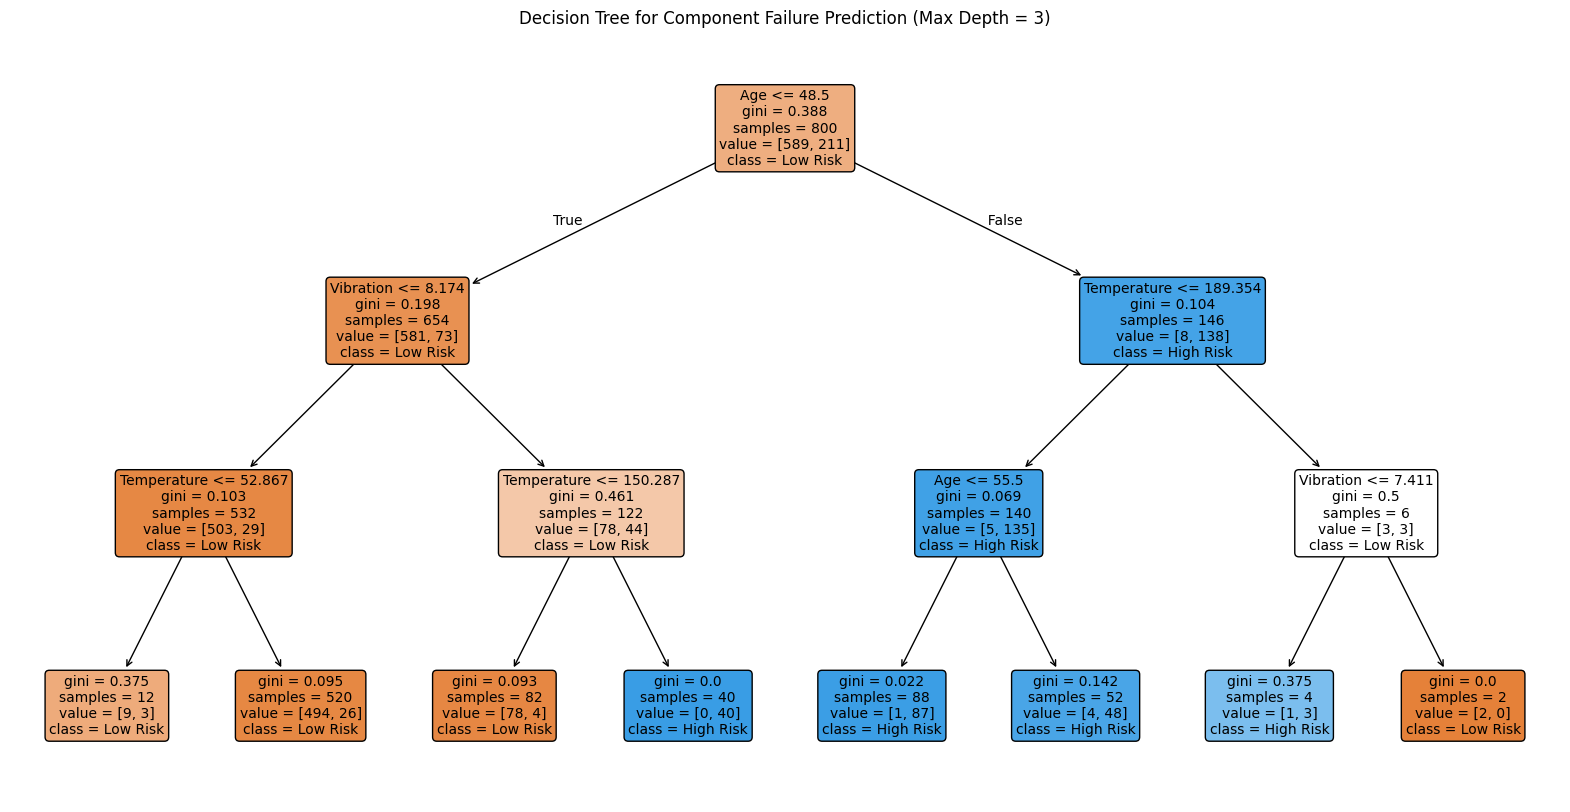

In [ ]:
# ==============================================================================
# CELL 2: Data Preprocessing and Model Training
# This is where we fit the decision tree model.
# ==============================================================================

# Separate features (X) and target (Y)
X = df.drop('Failure_Risk', axis=1)
Y = df['Failure_Risk']

# Split the data into training and testing sets
# We need to test the model on data it hasn't seen to check for overfitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# --- Initialize and Train the Decision Tree ---

# We instantiate the model, essentially grabbing the blueprint.
# We use 'max_depth' to limit the number of questions asked.
# Limiting depth stops the tree from getting too specific and 'memorizing' the data,
# which is the problem known as overfitting.
# max_depth=3 means the tree won't ask more than three levels of questions.
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# The 'fit' command is the magic: it hands the model our features (X_train) and
# the correct answers (Y_train), and the algorithm figures out the best questions.
model.fit(X_train, Y_train)

print("\nModel Training Complete.")
print(f"The model has learned a series of if-then questions (flowchart logic).")

# ==============================================================================
# CELL 3: Evaluation and Prediction
# ==============================================================================

# Make predictions on the unseen test data
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nModel Accuracy on Test Data: {accuracy:.2f}")

# --- Demonstrate a Prediction Path ---

# This simulates dropping a new piece of data in at the root node.
new_data = pd.DataFrame({
    'Temperature': [180.0],  # High Temperature
    'Vibration': [9.5],    # High Vibration
    'Pressure': [50.0],
    'Age': [40.0] # Added a value for Age
})

prediction = model.predict(new_data)

# Interpreting the prediction:
# The process follows the correct branch from the root node until it hits a leaf node.
if prediction == 1:
    result = "High Failure Risk (Prediction: 1)"
else:
    result = "Low Failure Risk (Prediction: 0)"

print(f"\nPrediction for New Data (Temp=180, Vib=9.5): {result}")


# ==============================================================================
# CELL 4: Visualizing the Decision Tree Logic (Optional but Recommended in Colab)
# Visualization helps demonstrate why Decision Trees are 'white box' models.
# ==============================================================================

# Import visualization tools (specific to scikit-learn in Colab)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set figure size for better viewing in Colab
plt.figure(figsize=(20, 10))

# Plot the tree, showing how the root node (first question) splits the data
plot_tree(model,
          feature_names=list(X.columns),
          class_names=['Low Risk', 'High Risk'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Component Failure Prediction (Max Depth = 3)")
plt.show()

epts Enhanced by this Project

This project highlights several core ideas from the sources:

1.  **Flowchart Logic:** The resulting Decision Tree visualization demonstrates that the model is simply a **flowchart** that learns a series of **if-then questions**.
2.  **Anatomy of the Tree:** You can identify the **root node** (the first, most important question), the **branches** (paths based on yes/no answers), and the **leaf nodes** (the final prediction).
3.  **Preventing Overfitting:** By setting `max_depth=3`, you explicitly tell the tree not to grow "too wild", preventing it from simply memorizing the synthetic data, which is a key weakness of single Decision Trees. This constraint is like giving a player only a few guesses in a game of 20 questions.


Model Training Complete.
The model has learned a series of if-then questions (flowchart logic).

Model Accuracy on Test Data: 0.94

Prediction for New Data (Temp=180, Vib=9.5): High Failure Risk (Prediction: 1)


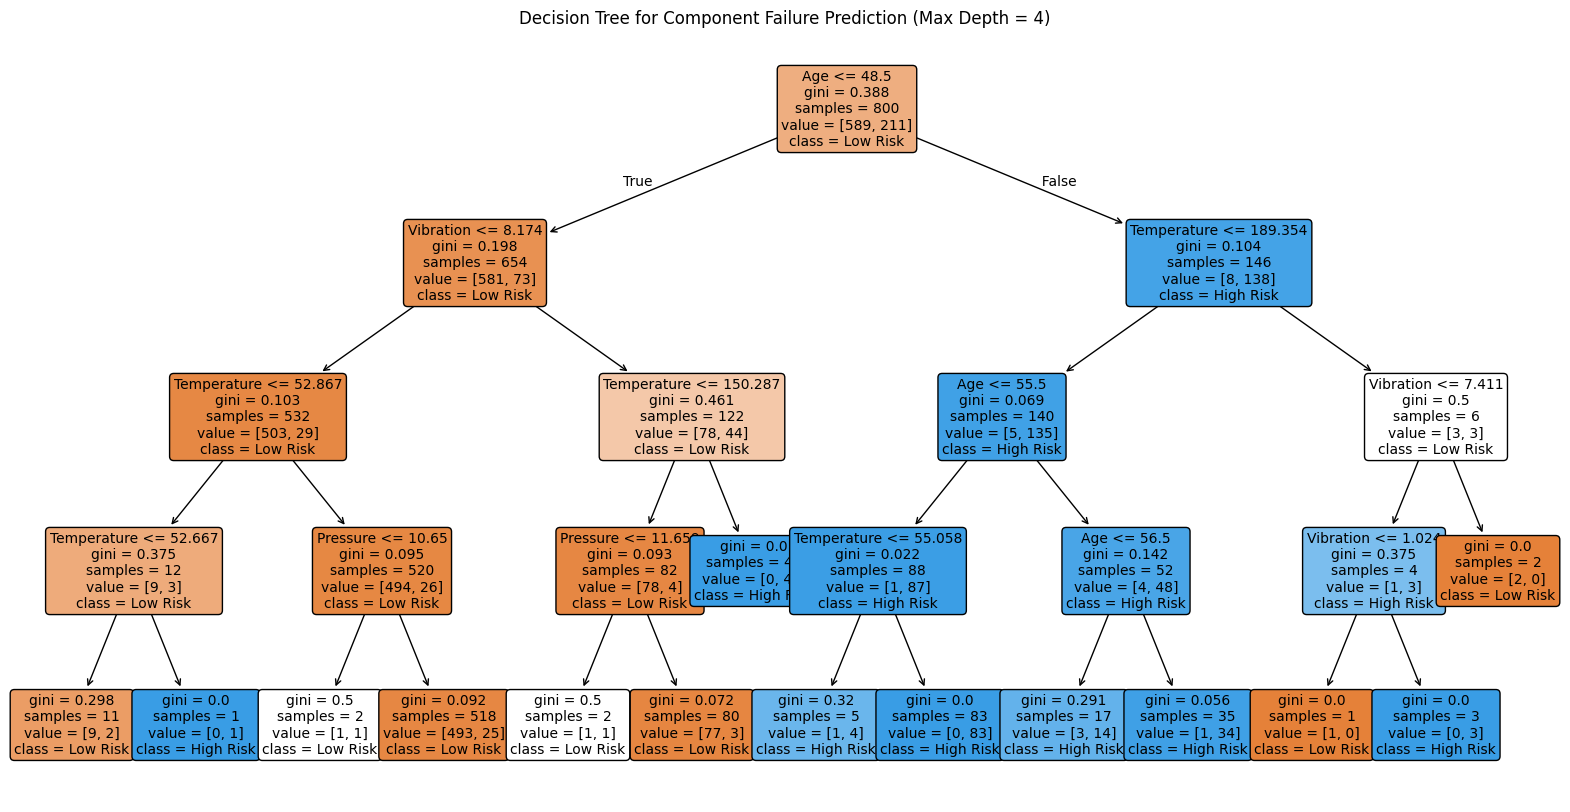

In [ ]:
# ==============================================================================
# CELL 2: Data Preprocessing and Model Training
# This is where we fit the decision tree model.
# ==============================================================================

# Separate features (X) and target (Y)
X = df.drop('Failure_Risk', axis=1)
Y = df['Failure_Risk']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# --- Initialize and Train the Decision Tree ---

# We set a MAX_DEPTH so students can easily change it and see the effect.
MAX_DEPTH = 4   # Try 2, 3, 4, or None (no limit) and compare the tree

model = DecisionTreeClassifier(
    max_depth=MAX_DEPTH,
    random_state=42
)

model.fit(X_train, Y_train)

print("\nModel Training Complete.")
print(f"The model has learned a series of if-then questions (flowchart logic).")

# ==============================================================================
# CELL 3: Evaluation and Prediction
# ==============================================================================

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nModel Accuracy on Test Data: {accuracy:.2f}")

new_data = pd.DataFrame({
    'Temperature': [180.0],
    'Vibration': [9.5],
    'Pressure': [50.0],
    'Age': [40.0]
})

prediction = model.predict(new_data)

if prediction == 1:
    result = "High Failure Risk (Prediction: 1)"
else:
    result = "Low Failure Risk (Prediction: 0)"

print(f"\nPrediction for New Data (Temp=180, Vib=9.5): {result}")

# ==============================================================================
# CELL 4: Visualizing the Decision Tree Logic
# ==============================================================================

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plot_tree(
    model,
    feature_names=list(X.columns),
    class_names=['Low Risk', 'High Risk'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title(f"Decision Tree for Component Failure Prediction (Max Depth = {MAX_DEPTH})")
plt.show()
